In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_svmlight_file
import numpy as np
import pickle
import glob
import os

from matplotlib.ticker import MaxNLocator

from utils import unpickle_dir

LOG_SCALE = True

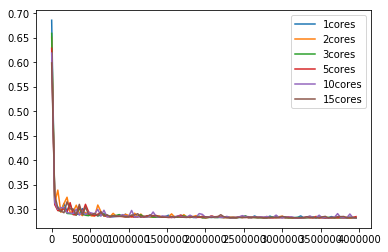

In [27]:
DIR = "../results/new_par_epsilon/"
runs = list(glob.glob(os.path.join(DIR, "*")))

data = dict([(p.split('/')[-1], unpickle_dir(p)) for p in runs])


for i in [1,2,3,5,10,15]:
    datum = data['top10-cores{}'.format(i)]
    plt.plot(datum['iters'], datum['losses'], label="{}cores".format(i))


plt.legend()
    

In [31]:
data['top10-cores1']

{'iters': array([      0,   40000,   80000,  120000,  160000,  200000,  240000,
         280000,  320000,  360000,  400000,  440000,  480000,  520000,
         560000,  600000,  640000,  680000,  720000,  760000,  800000,
         840000,  880000,  920000,  960000, 1000000, 1040000, 1080000,
        1120000, 1160000, 1200000, 1240000, 1280000, 1320000, 1360000,
        1400000, 1440000, 1480000, 1520000, 1560000, 1600000, 1640000,
        1680000, 1720000, 1760000, 1800000, 1840000, 1880000, 1920000,
        1960000, 2000000, 2040000, 2080000, 2120000, 2160000, 2200000,
        2240000, 2280000, 2320000, 2360000, 2400000, 2440000, 2480000,
        2520000, 2560000, 2600000, 2640000, 2680000, 2720000, 2760000,
        2800000, 2840000, 2880000, 2920000, 2960000, 3000000, 3040000,
        3080000, 3120000, 3160000, 3200000, 3240000, 3280000, 3320000,
        3360000, 3400000, 3440000, 3480000, 3520000, 3560000, 3600000,
        3640000, 3680000, 3720000, 3760000, 3800000, 3840000, 388000

stopping threshold 0.28269316496957


Text(0, 0.5, 'relative speed up to converge')

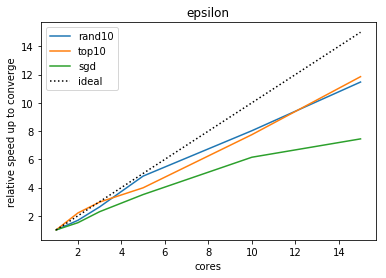

In [53]:
# put into one array (model, cores, timeserie)
models = ['rand10', 'top10', 'sgd']
cores = [1,2,3,5,10,15]
shape = [len(models), len(cores), len(data['rand10-cores1']['timers'])]
iters = np.zeros(shape)
losses = np.zeros(shape)
timers = np.zeros(shape)

for i, model in enumerate(models):
    for j, core in enumerate(cores):
        name = "{}-cores{}".format(model, core)
        datum = data[name]  # iters, loss, timers
        iters[i, j, :] = datum['iters']
        losses[i, j, :] = datum['losses']
        timers[i, j, :] = datum['timers']

threshold = losses.min(axis=-1).max()
print('stopping threshold', threshold)
stop_iter = (losses <= threshold).argmax(axis=-1)
chronos = np.zeros(stop_iter.shape)
for i in range(len(models)):
    for j in range(len(cores)):
        chronos[i,j] = timers[i,j,stop_iter[i, j]]

speedup = chronos[:, 0, np.newaxis] / chronos
for i, model in enumerate(models):
    plt.plot(cores, speedup[i], label=model)

plt.plot([1, 15], [1, 15], linestyle=':', color="black", label="ideal")
plt.legend()
plt.title('epsilon')
plt.xlabel('cores')
plt.ylabel('relative speed up to converge')